### setup

In [4]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np

import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.ion()

from PIL import Image

from datetime import datetime
from coastsat import SDS_upsampling



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### testing upsampling

In [6]:
# testing upsampling module
#image_path = 'data/dharavandhoo/jpg_files/preprocessed\RGB/2018-01-07-05-37-07_RGB_S2.jpg'
image_path = 'to_upsample.jpg'
sub_images, padding_list,target_size = SDS_upsampling.extract_sub_images(image_path, 128, 20)
#run the upsampling - this will take a while!
#up_sub_images = SDS_upsampling.upsample_subimages(sub_images)

x_steps=7, y_steps=7, x_step_size=103, y_step_size=104
Extracting sub-images...
original image size: (741, 750)
sub-image size: 128
{'left': 0, 'right': 613, 'top': 0, 'bottom': 622}
{'left': 0, 'right': 613, 'top': 104, 'bottom': 518}
{'left': 0, 'right': 613, 'top': 208, 'bottom': 414}
{'left': 0, 'right': 613, 'top': 312, 'bottom': 310}
{'left': 0, 'right': 613, 'top': 416, 'bottom': 206}
{'left': 0, 'right': 613, 'top': 520, 'bottom': 102}
{'left': 0, 'right': 613, 'top': 622, 'bottom': 0}
{'left': 103, 'right': 510, 'top': 0, 'bottom': 622}
{'left': 103, 'right': 510, 'top': 104, 'bottom': 518}
{'left': 103, 'right': 510, 'top': 208, 'bottom': 414}
{'left': 103, 'right': 510, 'top': 312, 'bottom': 310}
{'left': 103, 'right': 510, 'top': 416, 'bottom': 206}
{'left': 103, 'right': 510, 'top': 520, 'bottom': 102}
{'left': 103, 'right': 510, 'top': 622, 'bottom': 0}
{'left': 206, 'right': 407, 'top': 0, 'bottom': 622}
{'left': 206, 'right': 407, 'top': 104, 'bottom': 518}
{'left': 206

100%|██████████| 100/100 [03:13<00:00,  1.93s/it]


In [7]:
#pad images with empty pixels
padded_images = SDS_upsampling.pad_sub_images(up_sub_images, padding_list,target_size)
#reassemble images
new_image = SDS_upsampling.reassemble_images(padded_images)

(2964, 3000)


In [9]:
np.array(new_image).shape

(3000, 2964, 3)

In [10]:
new_image.save('D:/Github/CoastSat/to_upsample_up.png')

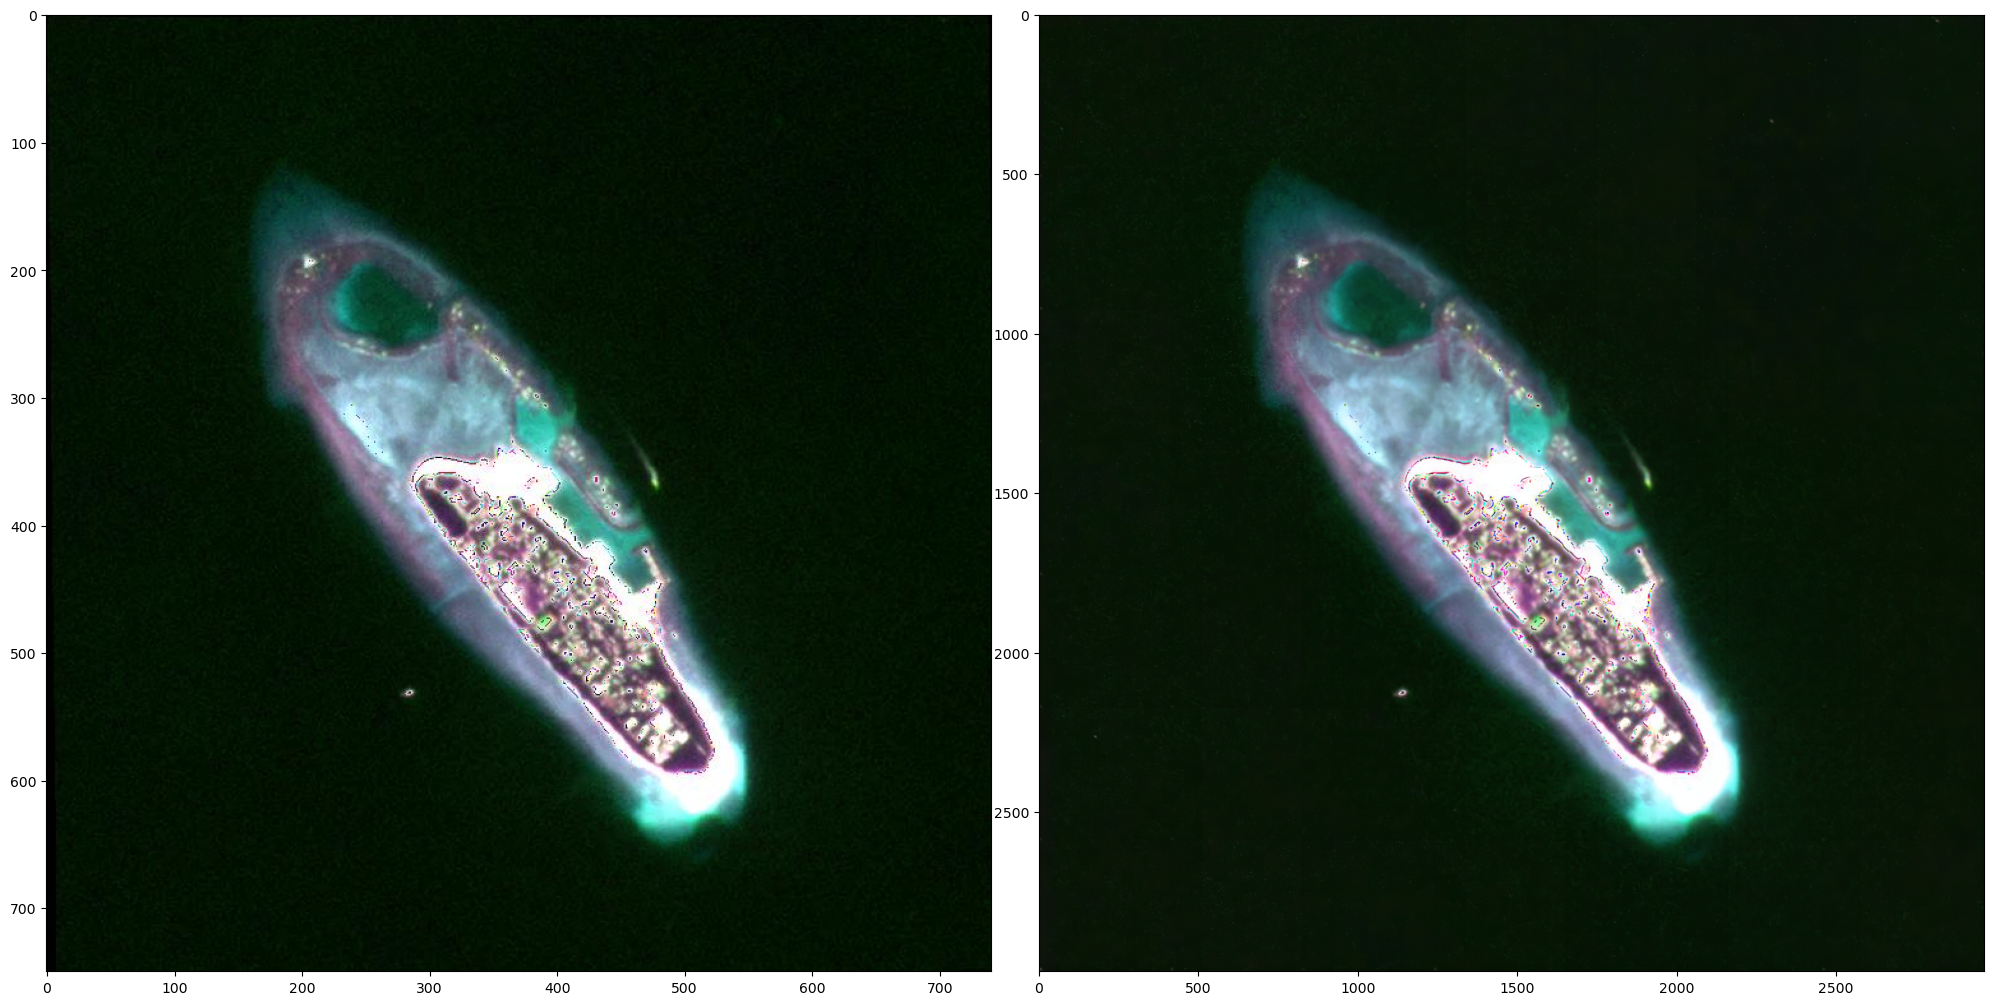

In [11]:
#display image
img = Image.open(image_path)

%matplotlib inline
fig = plt.figure(figsize=[25,25])
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.05)

plt.subplot(gs[0]).imshow(img)

plt.subplot(gs[1]).imshow(new_image)

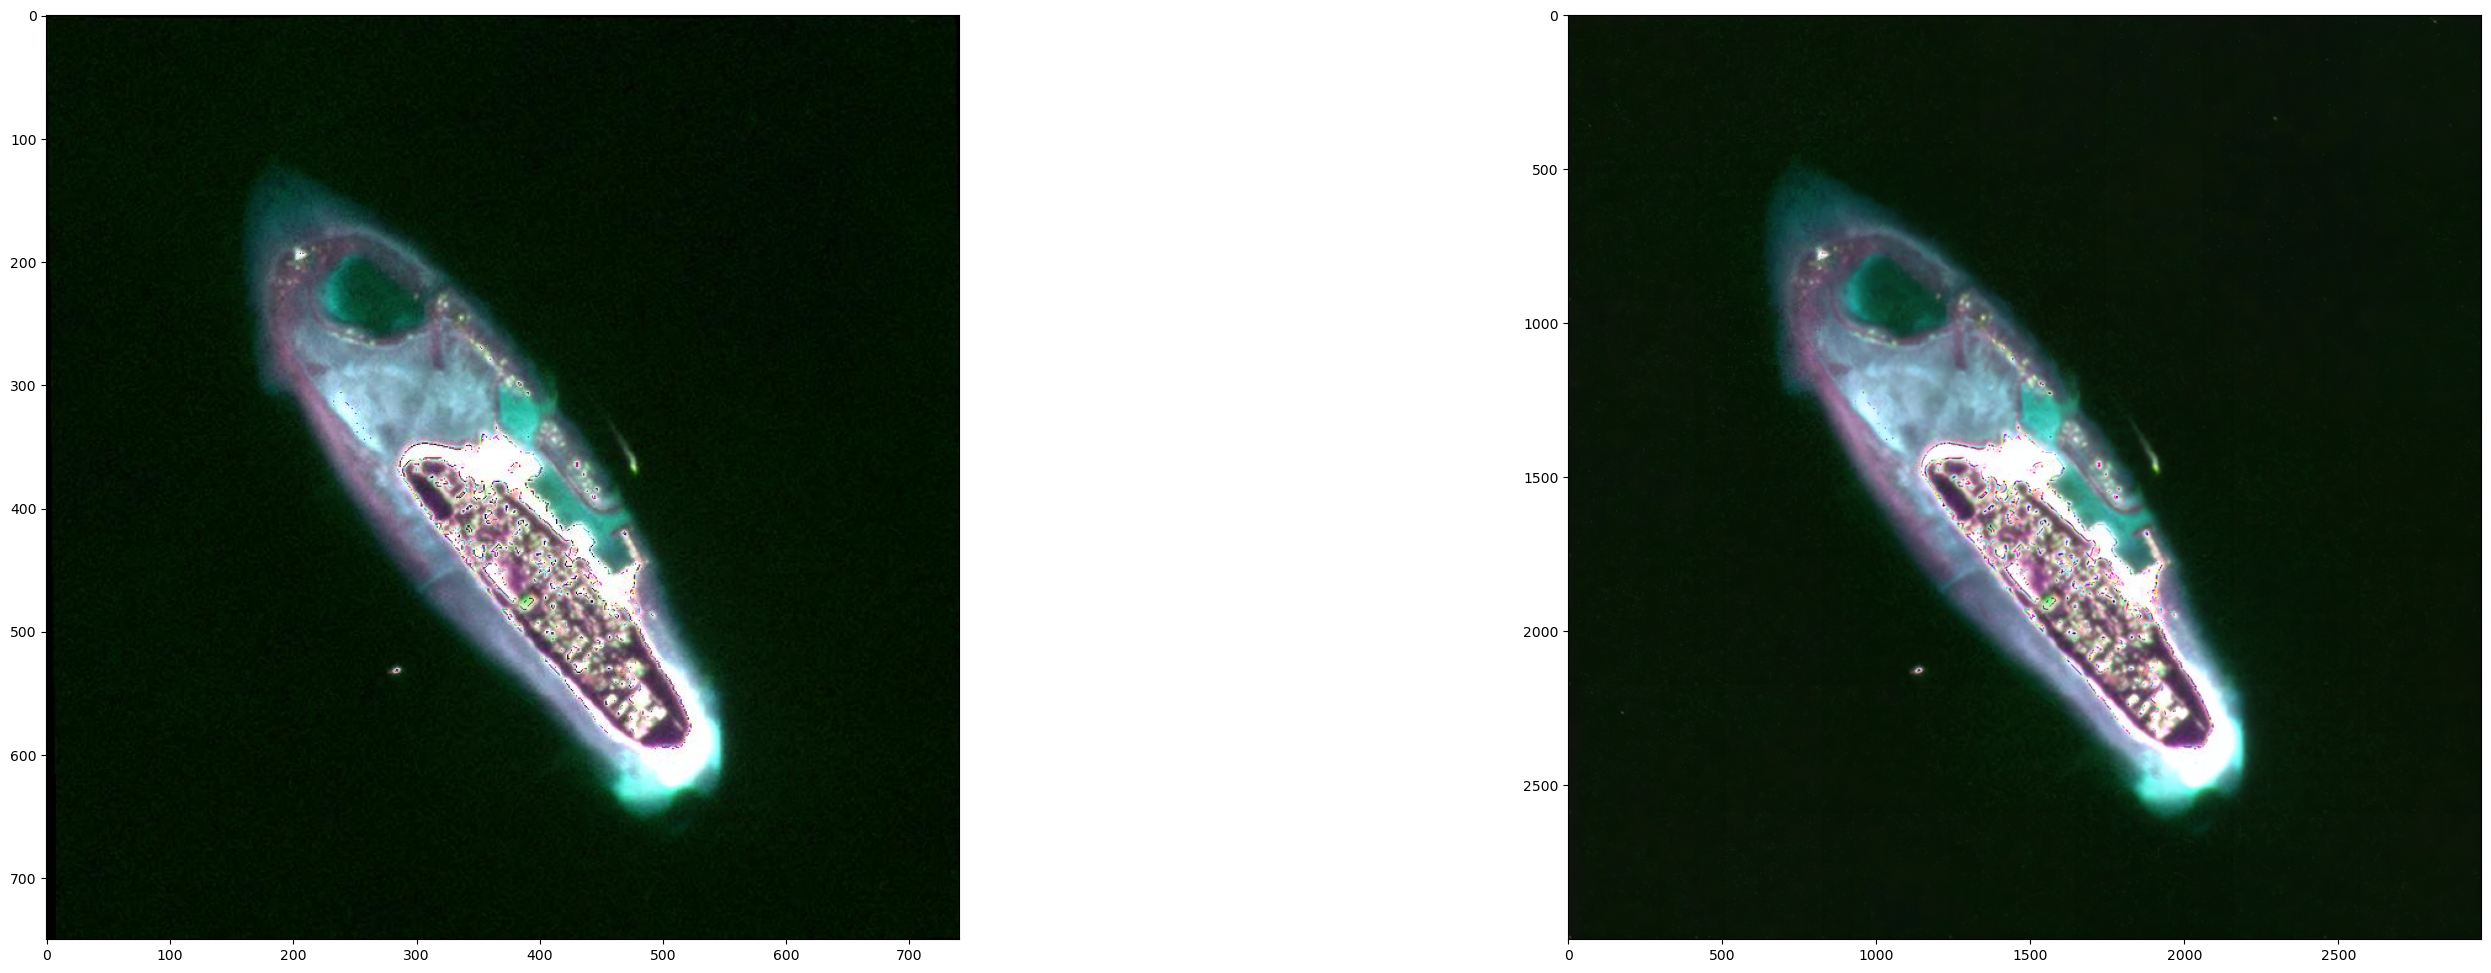

In [12]:
#%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(36,12))
ax[0].imshow(img)
ax[1].imshow(new_image)